# SmartBeds - One-Class - Pruebas con otros datos
## Grado en Ingeniería Informática
## Universidad de Burgos
##### José Luis Garrido Labrador

In [1]:
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import pickle as pk
from sklearn import metrics as mtr
from transformers import *

### Carga

In [2]:
def createDatos(nombre):
    return {'Raw':nombre+"raw.pdd",'SavGol':nombre+"savgol.pdd",'Butter':nombre+"butter.pdd",
         'Stats':nombre+"stats.pdd",'SavGol-Stats':nombre+"savgol-stats.pdd","Butter-Stats":nombre+"butter-stats.pdd"}

In [3]:
trainDS = createDatos('data/train-')
testDS = createDatos('data/test-')

### Transformers

In [4]:
#Reparador de targets
trT = MoveTargetsTransformer(window=25)

## Entrenamiento con primera crisis
### Brutos

In [5]:
with open('classifiers/2-RAW-seizure-classifier.pkl','rb') as f:
    raw_clf = pk.load(f)

In [6]:
with open(testDS['Raw'],'rb') as f:
    to_test = pk.load(f)
data_test = to_test.iloc[:,1:len(to_test.columns)-1]

In [7]:
predict = raw_clf.predict(data_test)
predict[predict==-1]=0
predict = predict.astype('bool')
predict

array([False, False, False, ..., False, False, False])

In [8]:
mtr.confusion_matrix(to_test['target'],predict)

array([[86713,   277],
       [ 2741,     0]])

0.05501780555821288


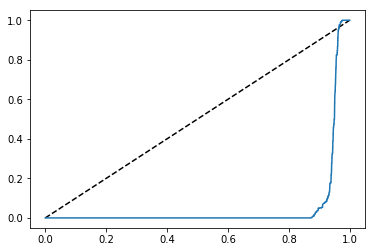

In [9]:
scr = raw_clf.score_samples(data_test)
fpr, tpr, thr = mtr.roc_curve(to_test['target'],scr)
print(mtr.roc_auc_score(to_test['target'],scr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)

### Estadísticos

In [10]:
with open('classifiers/2-STATS-seizure-classifier.pkl','rb') as f:
    sts_clf = pk.load(f)

In [11]:
with open(testDS['Stats'],'rb') as f:
    to_test = pk.load(f)
data_test = to_test.iloc[:,1:len(to_test.columns)-1]
data_test=data_test.dropna()

In [12]:
predict = sts_clf.predict(data_test)
predict[predict==-1]=0
predict = predict.astype('bool')
predict

array([False, False, False, ..., False, False, False])

In [13]:
to_test = trT.fit_transform(to_test).dropna()

mtr.confusion_matrix(to_test['target'],predict)

array([[86975,     0],
       [ 2732,     0]])

0.12221327967806839


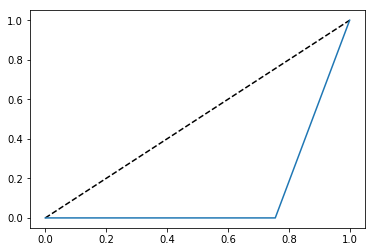

In [14]:
scr = sts_clf.score_samples(data_test)
fpr, tpr, thr = mtr.roc_curve(to_test['target'],scr)
print(mtr.roc_auc_score(to_test['target'],scr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)

### SavGol

In [15]:
with open('classifiers/2-SAVGOL-seizure-classifier.pkl','rb') as f:
    sav_clf = pk.load(f)

In [16]:
with open(testDS['SavGol'],'rb') as f:
    to_test = pk.load(f)
data_test = to_test.iloc[:,1:len(to_test.columns)-1]

In [17]:
predict = sav_clf.predict(data_test)
predict[predict==-1]=0
predict = predict.astype('bool')
predict

array([False, False, False, ..., False, False, False])

In [18]:
mtr.confusion_matrix(to_test['target'],predict)

array([[86898,    92],
       [ 2741,     0]])

0.05173507050569916


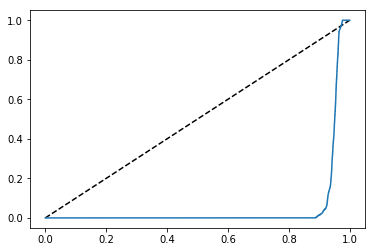

In [19]:
scr = sav_clf.score_samples(data_test)
fpr, tpr, thr = mtr.roc_curve(to_test['target'],scr)
print(mtr.roc_auc_score(to_test['target'],scr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)

### Butter

In [20]:
with open('classifiers/2-BUTTER-seizure-classifier.pkl','rb') as f:
    btt_clf = pk.load(f)

In [21]:
with open(testDS['Butter'],'rb') as f:
    to_test = pk.load(f)
data_test = to_test.iloc[:,1:len(to_test.columns)-1]

In [22]:
predict = btt_clf.predict(data_test)
predict[predict==-1]=0
predict = predict.astype('bool')
predict

array([False, False, False, ..., False, False, False])

In [23]:
mtr.confusion_matrix(to_test['target'],predict)

array([[86967,    23],
       [ 2741,     0]])

0.05633579557824269


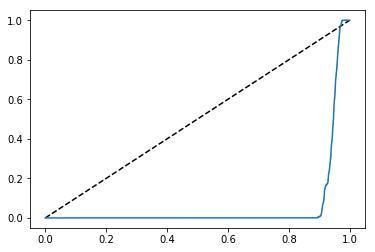

In [24]:
scr = btt_clf.score_samples(data_test)
fpr, tpr, thr = mtr.roc_curve(to_test['target'],scr)
print(mtr.roc_auc_score(to_test['target'],scr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)

### SavGol Estadísticos

In [25]:
with open('classifiers/2-SAVGOL-STATS-seizure-classifier.pkl','rb') as f:
    sts_clf = pk.load(f)

In [26]:
with open(testDS['SavGol-Stats'],'rb') as f:
    to_test = pk.load(f)
data_test = to_test.iloc[:,1:len(to_test.columns)-1]
data_test=data_test.dropna()

In [27]:
predict = sts_clf.predict(data_test)
predict[predict==-1]=0
predict = predict.astype('bool')
predict

array([False, False, False, ..., False, False, False])

In [28]:
to_test = trT.fit_transform(to_test).dropna()

mtr.confusion_matrix(to_test['target'],predict)

array([[86975,     0],
       [ 2732,     0]])

0.12079333141707388


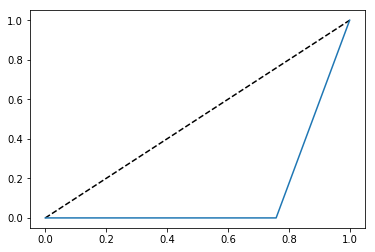

In [29]:
scr = sts_clf.score_samples(data_test)
fpr, tpr, thr = mtr.roc_curve(to_test['target'],scr)
print(mtr.roc_auc_score(to_test['target'],scr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)

### Butter Estadísticos

In [30]:
with open('classifiers/2-BUTTER_STATS-seizure-classifier.pkl','rb') as f:
    bts_clf = pk.load(f)

In [31]:
with open(testDS['SavGol-Stats'],'rb') as f:
    to_test = pk.load(f)
data_test = to_test.iloc[:,1:len(to_test.columns)-1]
data_test=data_test.dropna()

In [32]:
predict = bts_clf.predict(data_test)
predict[predict==-1]=0
predict = predict.astype('bool')
predict

array([False, False, False, ..., False, False, False])

In [33]:
to_test = trT.fit_transform(to_test).dropna()

mtr.confusion_matrix(to_test['target'],predict)

array([[86975,     0],
       [ 2732,     0]])

0.118275366484622


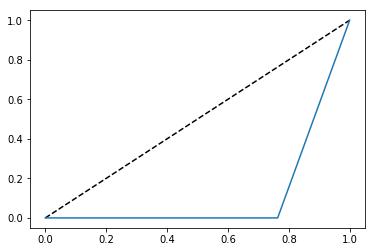

In [34]:
scr = bts_clf.score_samples(data_test)
fpr, tpr, thr = mtr.roc_curve(to_test['target'],scr)
print(mtr.roc_auc_score(to_test['target'],scr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)